# **Netflix is an application that keeps growing bigger and faster with its popularity, shows and content. This is an EDA or a story telling through its data along with a content-based recommendation system and a wide range of different graphs and visuals.**

![](https://media.giphy.com/media/oenruB2DKC7p6/giphy.gif)

In [1]:
# importing necessory librery
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

import warnings
warnings.simplefilter("ignore") # to filter unnecessory warnnings

# Loading the dataset

In [2]:
# reading data from csv
netflix_overall=pd.read_csv("data/netflix_movies_tvshow/netflix_titles.csv")

# checking first five records
netflix_overall.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

Therefore, it is clear that the dataset contains 12 columns for exploratory analysis.

In [3]:
# checking how much value each record has to find missing value in column
netflix_overall.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [4]:
# seprating data of tv_show and movie
netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']
netflix_movies=netflix_overall[netflix_overall['type']=='Movie']

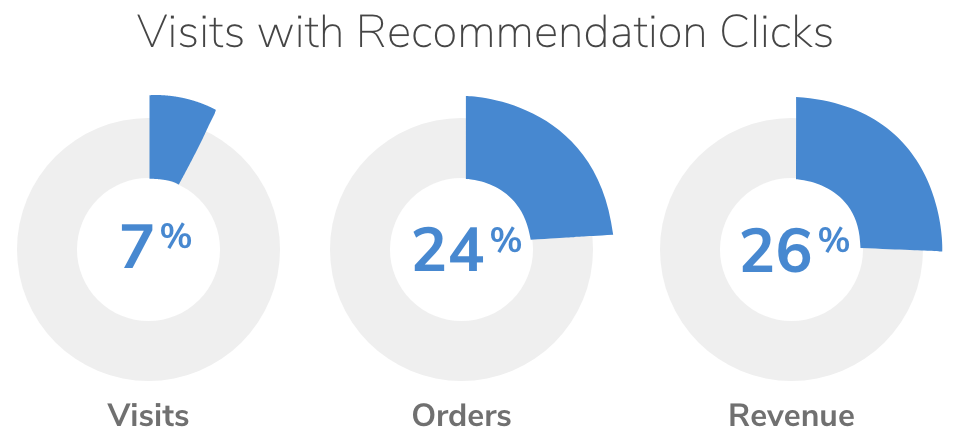

# Analysis of Movies vs TV Shows.

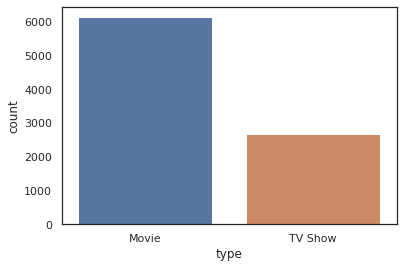

In [5]:
# setting style of seaborn
# There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks. They are each suited 
# to different applications and personal preferences. The default theme is darkgrid.
sns.set(style="white")

# Colors to use for the different levels of the hue variable
# other possible value of palette is pastel, husl, Set2, flare, deep, muted, bright, pastel, dark, 
# colorblind 
ax = sns.countplot(x="type", data=netflix_overall, palette="deep") 

It is evident that there are more Movies on Netflix than TV shows.

# If a producer wants to release some content, which month must he do so?( Month when least amount of content is added)

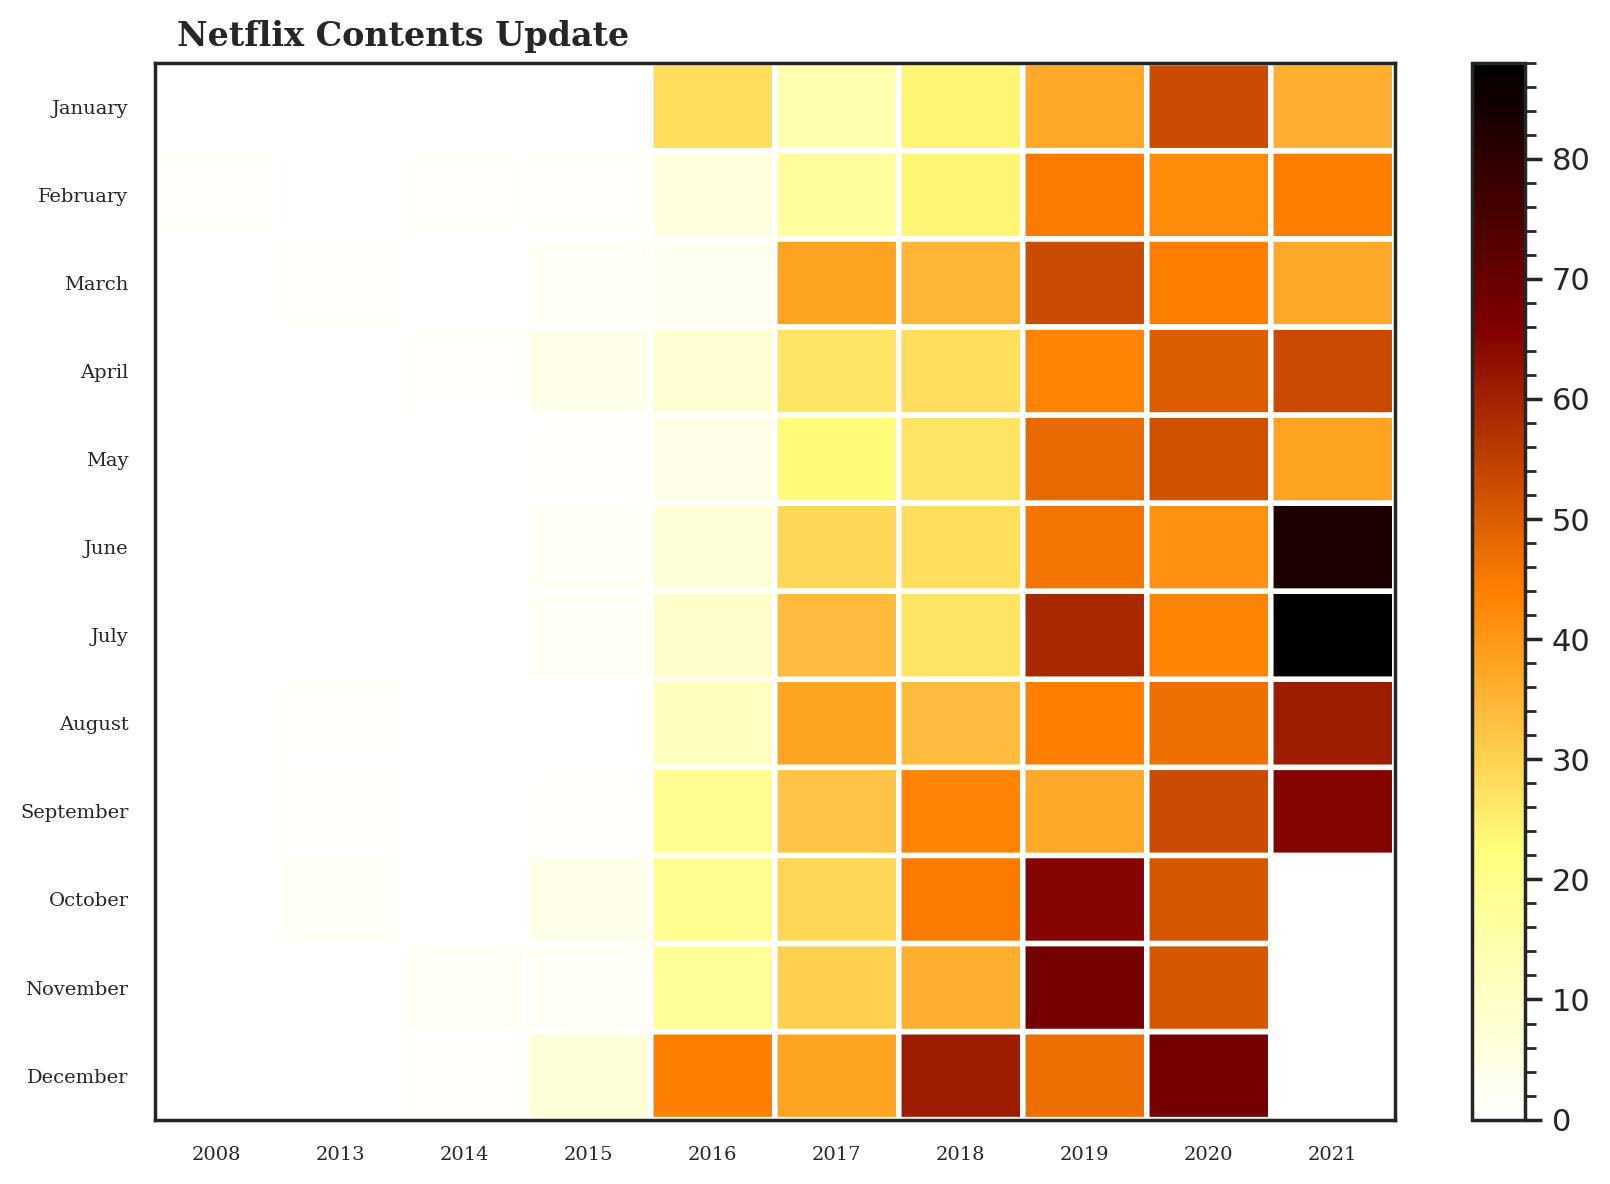

In [6]:
# droping NA (misssing values) and storing that in netflix_date
netflix_date = netflix_shows[['date_added']].dropna()

# creating new column of year
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])

# creating new column of month
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

# defined list of month in reverse order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

# getting total release year and month wise
df = netflix_date.groupby('year')['month'].value_counts()

# unstacking, filling na value with 0 and transposing it
df = df.unstack().fillna(0)[month_order].T
# print(df)

# creating figure
plt.figure(figsize=(10, 7), dpi=200)

# creating heatmap
# edgecolors - black, white
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) 

# setting lable for xaxis
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')

# setting label for yaxis
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

# adding title
plt.title('Netflix Contents Update', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.20, 1.0+0.02))

# adding colorbar
cbar = plt.colorbar()

# setting minor ticks on colorbar
cbar.ax.minorticks_on()

# showing figure
plt.show()

If the latest year 2019 is considered, January and December were the months when comparatively much less content was released.Therefore, these months may be a good choice for the success of a new release!

# Movie ratings analysis

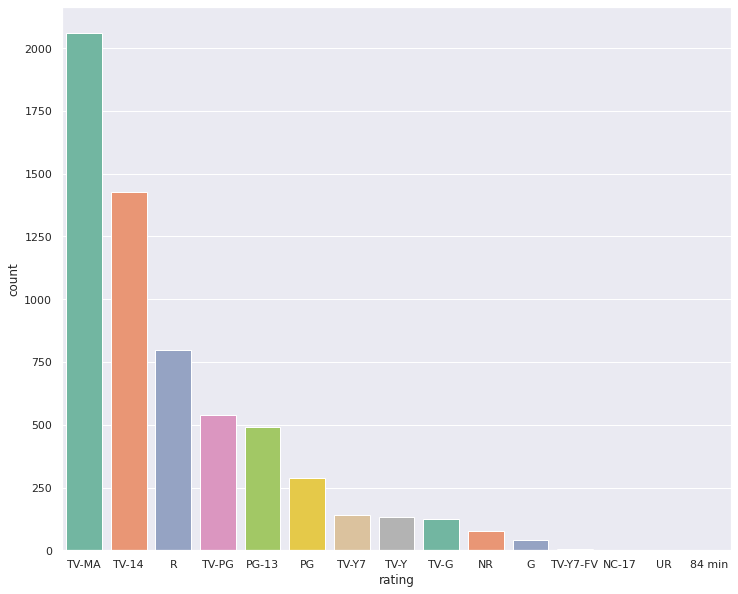

In [7]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")

# creating chart showing popularity of ratings(here ratings specify the content audience can see) of movie
# order specify the order in which bar appear and also number of bar to be shown
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only. 

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the  very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

# Analysing IMDB ratings to get top rated movies on Netflix

In [8]:
# setting low_memory=False to ignore warnings
imdb_ratings=pd.read_csv('data/imdb_movies/IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('data/imdb_movies/IMDb movies.csv', usecols=['title','year','genre'])

# creating dataframe which combine both dataframe (ratings and titles)
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})

# dropping duplicate columns and replacing in existing dataframe
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(85852, 4)

Performing inner join on the ratings dataset and netflix dataset to get the content that has both ratings on IMDB and are available on Netflix.

In [9]:
# droping records with na values
ratings.dropna()

# merging dataframe of netflix and imdb where title is similiar.
# left_on specify column name in first df while right_on specify column name of second df 
joint_data=ratings.merge(netflix_overall,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

top_rated=joint_data[0:10]

Top rated 5 movies on Netflix are:

In [10]:
top_rated.head(5)

Title Release Year  Rating                      Genre  \
1105          Innocent         2017     9.0                     Comedy   
1116          Breakout         2019     9.0   Adventure, Comedy, Drama   
441       Pulp Fiction         1994     8.9               Crime, Drama   
421   Schindler's List         1993     8.9  Biography, Drama, History   
1442         Inception         2010     8.8  Action, Adventure, Sci-Fi   

     show_id     type             title           director  \
1105   s4175  TV Show          Innocent         Seren Yüce   
1116   s5394  TV Show          Breakout                NaN   
441    s7803    Movie      Pulp Fiction  Quentin Tarantino   
421    s7958    Movie  Schindler's List   Steven Spielberg   
1442    s341    Movie         Inception  Christopher Nolan   

                                                   cast  \
1105  Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...   
1116  Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...   
441   John Travolta, Samuel L. Jackson, Uma Thurman,...   
421   Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...   
1442  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...   

                            country        date_added  release_year rating  \
1105                         Turkey  January 23, 2019          2017  TV-MA   
1116                            NaN      July 1, 2017          2010  TV-14   
441                   United States   January 1, 2019          1994      R   
421                   United States     April 1, 2018          1993      R   
1442  United States, United Kingdom    August 1, 2021          2010  PG-13   

      duration                                          listed_in  \
1105  1 Season  Crime TV Shows, International TV Shows, TV Dramas   
1116  1 Season                  International TV Shows, TV Dramas   
441    154 min                Classic Movies, Cult Movies, Dramas   
421    195 min                             Classic Movies, Dramas   
1442   148 min    Action & Adventure, Sci-Fi & Fantasy, Thrillers   

                                            description  
1105  In a peaceful, rustic town, a retired officer ...  
1116  After losing her family in a suspicious car cr...  
441   This stylized crime caper weaves together stor...  
421   Oskar Schindler becomes an unlikely humanitari...  
1442  A troubled thief who extracts secrets from peo...

Countries with highest rated content.

In [11]:
# getting list of country which has highest rated content
country_count=joint_data['country'].value_counts().sort_values(ascending=False)

# converting series into dataframe
country_count=pd.DataFrame(country_count)

# printing to 10 country data, which produces most content
topcountries=country_count[0:11]
print(topcountries)

                               country
United States                      865
India                              718
United Kingdom                     119
Canada                              57
Philippines                         50
Spain                               41
South Korea                         38
Indonesia                           38
France                              37
United Kingdom, United States       31
Nigeria                             31


# Year wise analysis

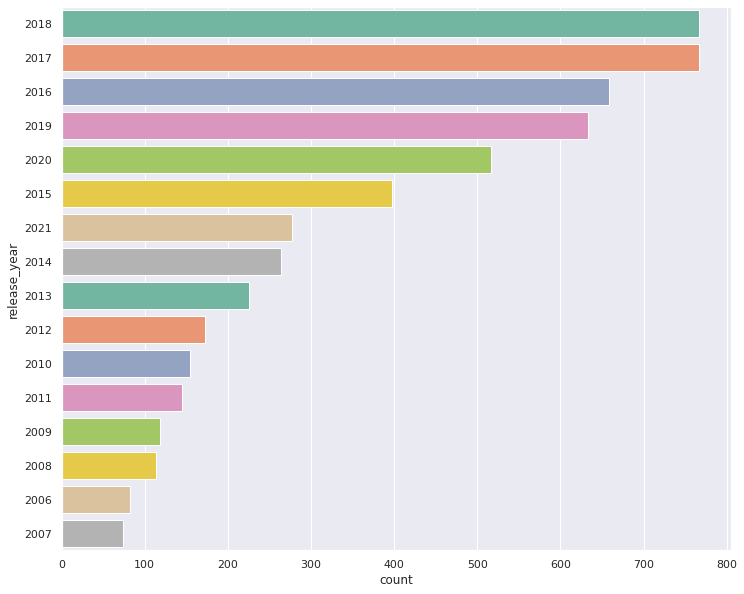

In [12]:
# creating figure
plt.figure(figsize=(12,10))

# ploting in which year how many movies are released (ploting only to 15)
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:16])

So, 2017 was the year when most of the movies were released.

In [13]:
# getting list of country which produce most movies
countries={} # defining blank dictionary in which we fill data latter
netflix_movies['country'].fillna('Unknown', inplace=True) # filling na value with Unknown in country column

cou=list(netflix_movies['country']) # creating one list out country column in netflix_movies dataframe
for i in cou:
    i=list(i.split(','))
    if len(i)==1: # to handle single country
        if i in list(countries.keys()):
            countries[i]+=1
        else: 
            countries[i[0]]=1 # if country not exist then adding record in dictionary
    else: # to handle multiple country comma seprated
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1 # if country already exist the adding 1 in it
            else:
                countries[j]=1 # if country not exist then adding record in dictionary

print('printing first 5 elements of country')
list(countries.items())[:5]

printing first 5 elements of country


[('United States', 1),
 ('Unknown', 1),
 (' Ghana', 1),
 (' Burkina Faso', 1),
 (' United Kingdom', 152)]

In [14]:
# adding if any dictionay has duplicate value with just diffrence of ' '
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no

# sorting according to the country which produced most movies
print(f'Before sorting\n {countries_fin}\n')
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}
print(f'fter sorting\n {countries_fin}\n')

Before sorting
 {'UnitedStates': 389, 'Unknown': 1, 'Ghana': 3, 'BurkinaFaso': 1, 'UnitedKingdom': 153, 'Germany': 107, 'Ethiopia': 1, 'CzechRepublic': 16, 'India': 36, 'France': 158, 'China': 56, 'Canada': 134, 'SouthAfrica': 23, 'Japan': 37, 'Nigeria': 8, 'Spain': 43, 'Australia': 34, 'Mexico': 26, 'Italy': 28, 'Romania': 5, 'Argentina': 17, 'Venezuela': 4, 'HongKong': 25, 'Nepal': 2, 'NewZealand': 12, 'Brazil': 11, 'Greece': 9, 'Colombia': 6, 'Belgium': 70, 'Switzerland': 16, 'Bulgaria': 9, '': 6, 'Algeria': 3, 'Poland': 11, 'Israel': 8, 'SaudiArabia': 3, 'Thailand': 6, 'Indonesia': 4, 'Egypt': 7, 'Denmark': 17, 'Kuwait': 1, 'Netherlands': 22, 'Singapore': 12, 'Malaysia': 3, 'SouthKorea': 15, 'Vietnam': 1, 'Hungary': 6, 'Lebanon': 8, 'Syria': 2, 'Philippines': 4, 'UnitedArabEmirates': 19, 'Sweden': 24, 'Qatar': 10, 'Mauritius': 1, 'Austria': 5, 'Turkey': 3, 'Russia': 9, 'Taiwan': 6, 'Cameroon': 1, 'Palestine': 1, 'Ireland': 11, 'Kenya': 4, 'Chile': 7, 'Uruguay': 7, 'Cambodia': 6, 'B

# TOP 10 MOVIE CONTENT CREATING COUNTRIES

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'France'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Belgium'),
 Text(6, 0, 'China'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'India')]

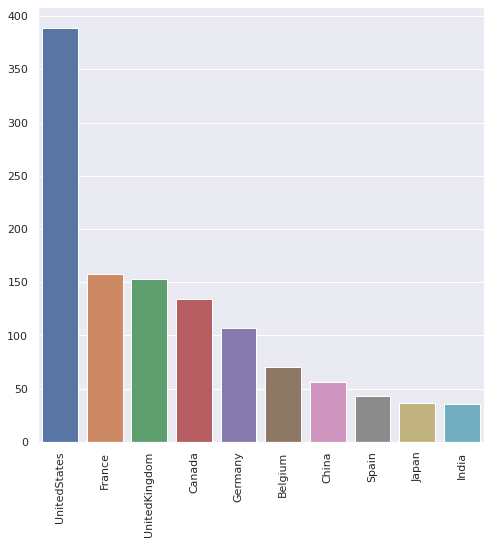

In [15]:
plt.figure(figsize=(8,8))

# ploting barplot
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])

# ploting labels 90 degree rotated so that it looks good
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)


# Analysis of duration of movies

In [16]:
netflix_movies = netflix_movies.dropna() # droping raws with na values if exists any

# extracting minutes from duration column and converting it to integer
netflix_movies.loc[:,'duration']=netflix_movies['duration'].str.replace(' min','')

# converting column to integer from string
netflix_movies.loc[:,'duration']=netflix_movies['duration'].astype(str).astype(int)

# checking updated duration 
print(netflix_movies['duration'].head())

6      91
7     125
9     104
12    127
13     91
Name: duration, dtype: int64


<AxesSubplot:xlabel='duration', ylabel='Density'>

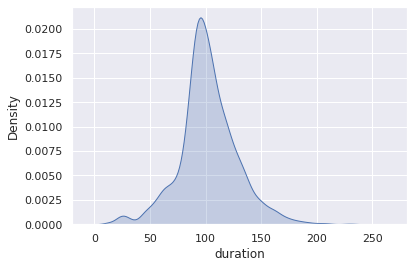

In [17]:
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, 
# analagous to a histogram.
# Relative to a histogram, KDE can produce a plot that is less cluttered and more interpretable, especially when 
# drawing multiple distributions.
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

So, a good amount of movies on Netflix are among the duration of 75-120 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting. Can you? :p

In [18]:
from collections import Counter

genres=list(netflix_movies['listed_in'])
print(f'printing first 5 genres {genres[:5]}')

gen=[]

for i in genres:
    # getting individual elements from comma seperated string
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))

# counting number of movies each genre has
g=Counter(gen)

print(f'genre counter is {g}')

printing first 5 genres ['Children & Family Movies', 'Dramas, Independent Movies, International Movies', 'Comedies, Dramas', 'Dramas, International Movies', 'Children & Family Movies, Comedies']
genre counter is Counter({'InternationalMovies': 2548, 'Dramas': 2397, 'Comedies': 1636, 'Action&Adventure': 848, 'IndependentMovies': 751, 'RomanticMovies': 604, 'Children&FamilyMovies': 583, 'Thrillers': 575, 'Documentaries': 418, 'HorrorMovies': 352, 'Music&Musicals': 328, 'Stand-UpComedy': 318, 'Sci-Fi&Fantasy': 237, 'SportsMovies': 163, 'ClassicMovies': 109, 'LGBTQMovies': 83, 'CultMovies': 70, 'AnimeFeatures': 68, 'Faith&Spirituality': 60, 'Movies': 27})


# WordCloud for Genres.

In [19]:
# installing wordcloud if not already
!pip install wordcloud -q# adding if any dictionay has duplicate value with just diffrence of ' '# adding if any dictionay has duplicate value with just diffrence of ' '


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -#


printing 5 element of ['CultMovies', 'Sci-Fi&Fantasy', 'ClassicMovies', 'AnimeFeatures', 'SportsMovies']


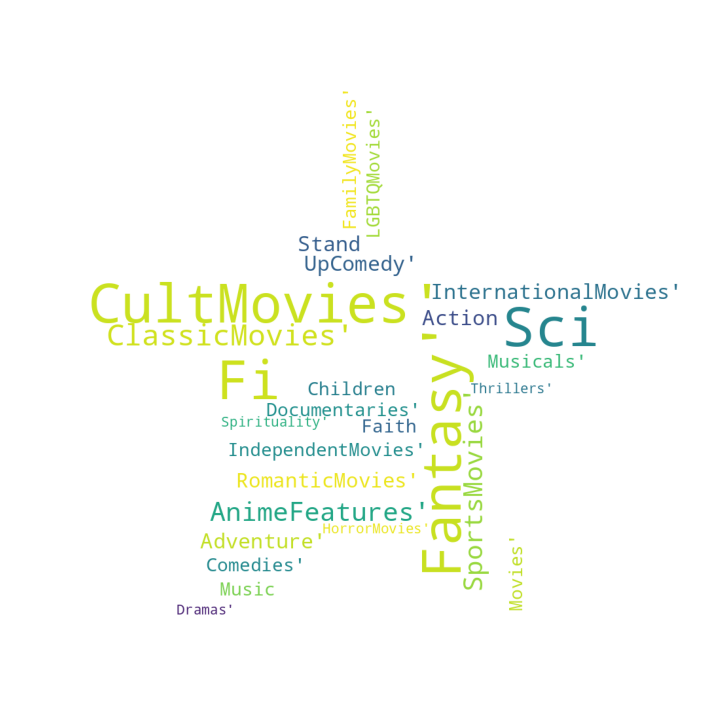

In [20]:
from wordcloud import WordCloud
from PIL import Image

text = list(set(gen))
print(f'printing 5 element of {text[:5]}')
plt.rcParams['figure.figsize'] = (13, 13)

#assigning shape to the word cloud
mask = np.array(Image.open('star.png')) # reading image and converting it into numpy array
wordcloud = WordCloud(max_words=1000000,background_color="white",mask=mask).generate(str(text))

# showing image of wordcloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Lollipop plot of Genres vs their count on Netflix

Text(0.5, 1.0, 'Genres')

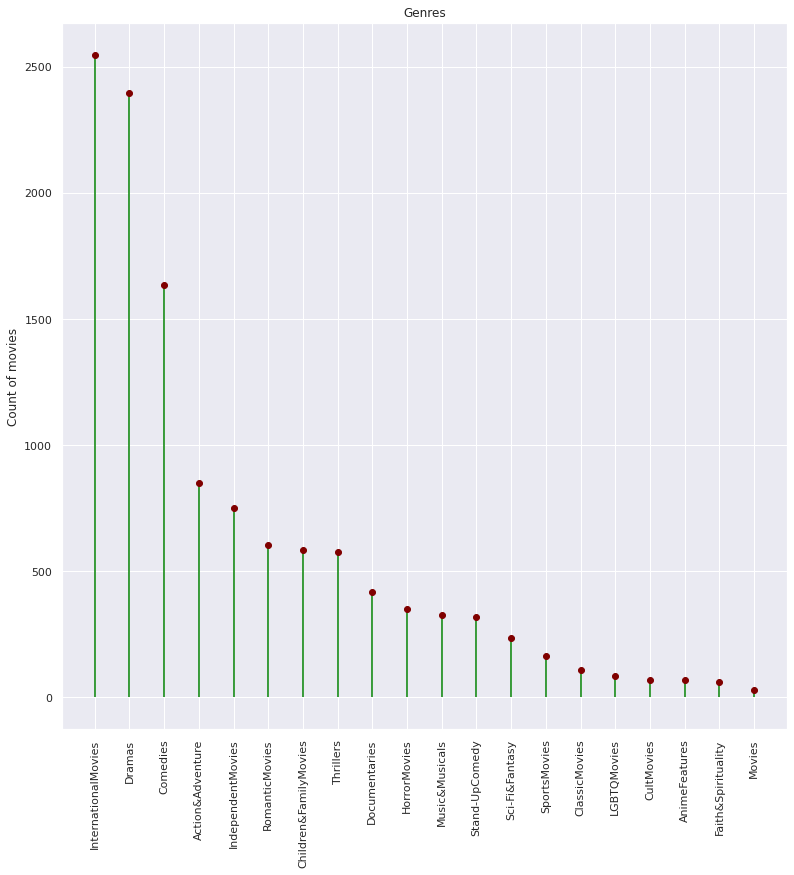

<Figure size 720x720 with 0 Axes>

In [21]:
# sorting with the genere with most count to less count
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))

# extracting variables which we want to plot in lolipop plot
x=list(g.keys())
y=list(g.values())

# ploting chart
ax.vlines(x, ymin=0, ymax=y, color='green') # ploting horizontal line
ax.plot(x,y, "o", color='maroon') # ploting red dot on actual value
ax.set_xticklabels(x, rotation = 90) # setting label of x axis with proper rotation to see better
ax.set_ylabel("Count of movies") # setting ylabel
ax.set_title("Genres") # set a title

Therefore, it is clear that international movies, dramas and comedies are the top three genres that have the highest amount of content on Netflix.

# Analysis of TV SERIES on Netflix

This is the same thing we done above for netflix movies

In [22]:
countries1={}
netflix_shows.loc[:,'country']=netflix_shows['country'].fillna('Unknown') # filling NA values
cou1=list(netflix_shows['country']) # creating list of country with possibly multiple value comma seprated


for i in cou1:
    i=list(i.split(','))
    if len(i)==1: # to handle single country
        if i in list(countries1.keys()): # if country already exist the adding 1 in it
            countries1[i]+=1
        else: # if country not exist then 
            countries1[i[0]]=1
    else: # to handle multiple country comma seprated
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1 # if country already exist the adding 1 in it
            else:
                countries1[j]=1 # if country not exist then 

In [23]:
# adding if any dictionay has duplicate value with just diffrence of ' '
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no
        
countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}


# Most content creating countries

Text(0, 0.5, 'Arrival delay (in minutes)')

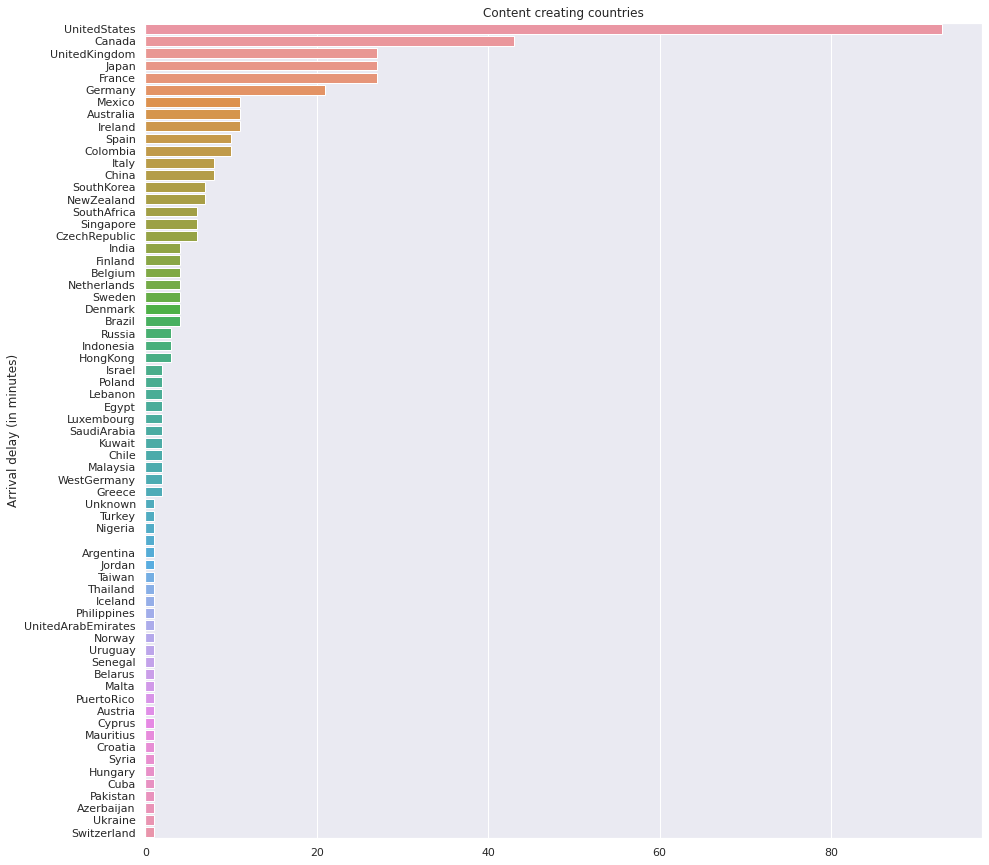

In [24]:
# Set the width and height of the figure
plt.figure(figsize=(15,15))

# Add title
plt.title("Content creating countries")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()))

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

Naturally, United States has the most content that is created on netflix in the tv series category.

In [25]:
features=['title','duration']
durations= netflix_shows[features]

print(f'durations dataframe before processing is below\n{durations.head(3)}\n')
durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

# #durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

print(f'durations dataframe after processing is below\n{durations.head(3)}')

durations dataframe before processing is below
                   title   duration
1          Blood & Water  2 Seasons
2              Ganglands   1 Season
3  Jailbirds New Orleans   1 Season

durations dataframe after processing is below
                   title   duration no_of_seasons
1          Blood & Water  2 Seasons             2
2              Ganglands   1 Season             1
3  Jailbirds New Orleans   1 Season             1


In [26]:
# converting duration to int
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

# TV shows with largest number of seasons

In [27]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False) # sorting with highest number of season

<AxesSubplot:xlabel='title'>

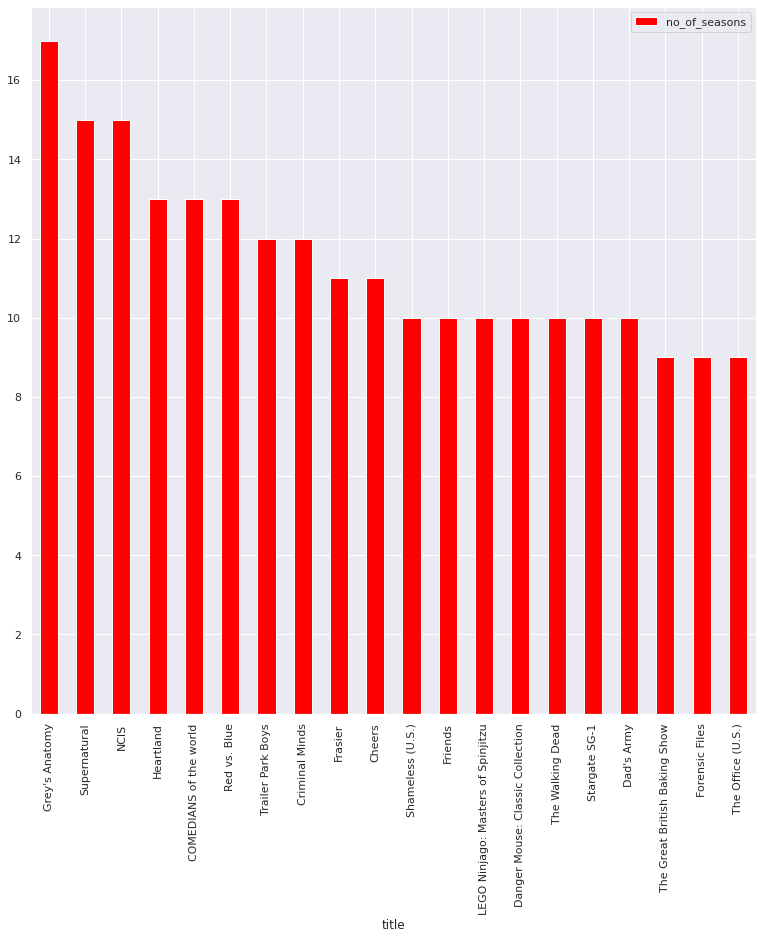

In [28]:
top20=top[0:20] # just fetching first 20
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red') # ploting graph

Thus, NCIS, Grey's Anatomy and Supernatural are amongst the tv series that have highest number of seasons.

# Lowest number of seasons.

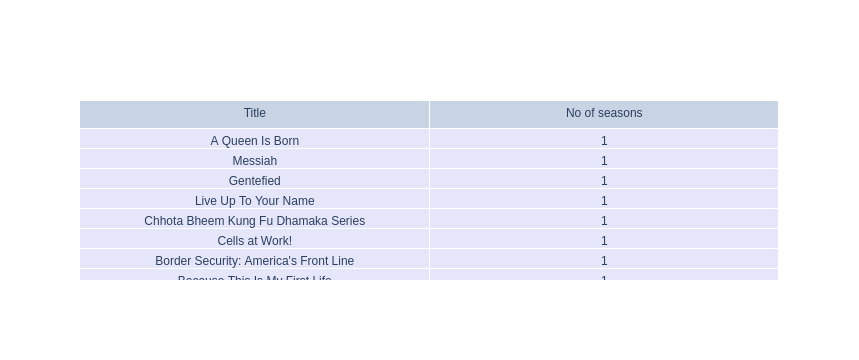

In [29]:
bottom=top.sort_values(by='no_of_seasons')
bottom=bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Table(header=dict(values=['Title', 'No of seasons']),
                                cells=dict(values=[bottom['title'],
                                            bottom['no_of_seasons']],
                                            fill_color='lavender')
                                          )
         ]
)

fig.show()

These are some binge-worthy shows that are short and have only one season.

Counting the number of tvshow has in each genre

In [30]:
# extracting column of genre from dataframe
genres=list(netflix_shows['listed_in'])

gen=[]

for i in genres:
    i=list(i.split(',')) # seprating multivalue genre from sigle element
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

print('number of tvshow in each genre is as below')
pprint(g)

number of tvshow in each genre is as below
Counter({'InternationalTVShows': 1351,
         'TVDramas': 763,
         'TVComedies': 581,
         'CrimeTVShows': 470,
         "Kids'TV": 451,
         'Docuseries': 395,
         'RomanticTVShows': 370,
         'RealityTV': 255,
         'BritishTVShows': 253,
         'AnimeSeries': 176,
         'Spanish-LanguageTVShows': 174,
         'TVAction&Adventure': 168,
         'KoreanTVShows': 151,
         'TVMysteries': 98,
         'Science&NatureTV': 92,
         'TVSci-Fi&Fantasy': 84,
         'TVHorror': 75,
         'TeenTVShows': 69,
         'TVThrillers': 57,
         'Stand-UpComedy&TalkShows': 56,
         'Classic&CultTV': 28,
         'TVShows': 16})


# Word Cloud for Genres

A word cloud is an image made of words that together resemble a cloudy shape.

(-0.5, 4095.5, 3071.5, -0.5)

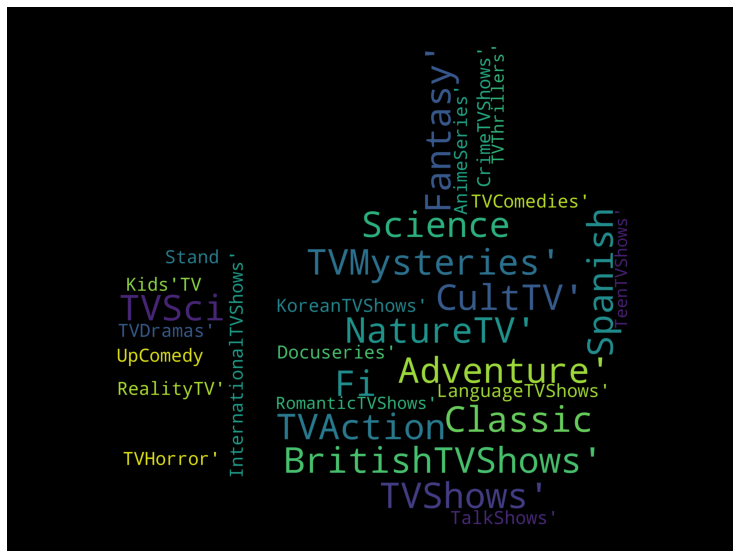

In [31]:
from wordcloud import WordCloud

text = list(set(gen))

mask=np.array(Image.open('upvote.png'))
wordcloud = WordCloud(max_words=1000000,background_color="black",mask=mask) # initializing wordcloud objetcs with basic parameters
wordcloud.generate(str(text)) # generating word cloud
plt.rcParams['figure.figsize'] = (13, 13) # setting figure size
plt.imshow(wordcloud)  # showing image
plt.axis("off") # setting axis off

In [32]:
# selecting tvshow from US only
us_series_data=netflix_shows[netflix_shows['country']=='United States']

In [33]:
# getting oldest us series
oldest_us_series=us_series_data.sort_values(by='release_year')[0:20]

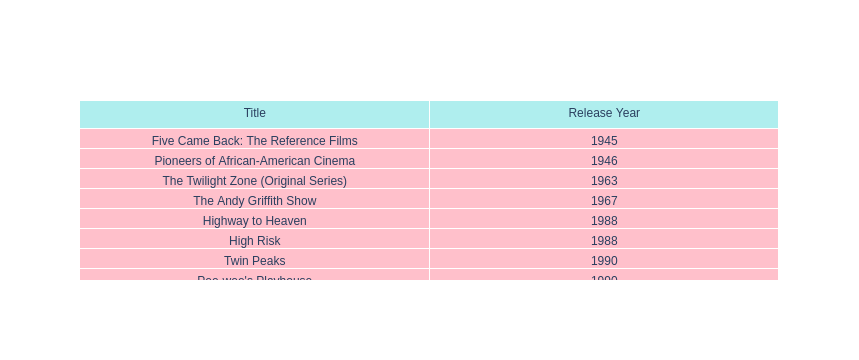

In [34]:
# ploting data in table
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='paleturquoise'),
                 cells=dict(values=[oldest_us_series['title'],oldest_us_series['release_year']],fill_color='pink'))
                     ])
fig.show() # showing image

Above table shows the oldest US tv shows on Netflix.

In [35]:
# getting newest US seires
newest_us_series=us_series_data.sort_values(by='release_year', ascending=False)[0:50]

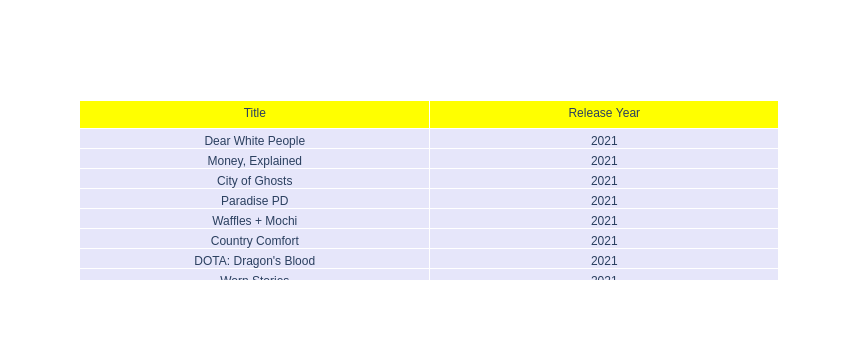

In [36]:
# plotting dagta of us series to newest value
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='yellow'),
                 cells=dict(values=[newest_us_series['title'],newest_us_series['release_year']],fill_color='lavender'))
                     ])
fig.show()

The above are latest released US television shows!

# Content in France

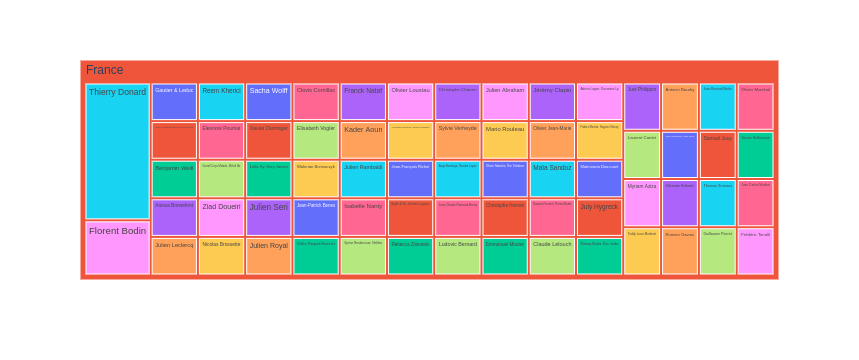

In [37]:
netflix_fr=netflix_overall[netflix_overall['country']=='France']
nannef=netflix_fr.dropna()
import plotly.express as px
fig = px.treemap(nannef, path=['country','director'],
                  color='director', hover_data=['director','title'],color_continuous_scale='Purples')
fig.show()


It is very interesting to note that the content in France is very rational. There is no director in the data who has a large number of movies. In my opinion, it shows how different directors are given a chance to showcase their talents. What do you think?

In [38]:
# sorting french tv series by year
newest_fr_series=netflix_fr.sort_values(by='release_year', ascending=False)[0:20]

In [39]:
newest_fr_series.head(2)

show_id   type                       title  \
91       s92  Movie  The Women and the Murderer   
1110   s1111  Movie               Madame Claude   

                                director  \
91    Mona Achache, Patricia Tourancheau   
1110                     Sylvie Verheyde   

                                                   cast country  \
91                                                  NaN  France   
1110  Karole Rocher, Garance Marillier, Roschdy Zem,...  France   

             date_added  release_year rating duration  \
91    September 9, 2021          2021  TV-14   92 min   
1110      April 2, 2021          2021  TV-MA  113 min   

                                listed_in  \
91    Documentaries, International Movies   
1110         Dramas, International Movies   

                                            description  
91    This documentary traces the capture of serial ...  
1110  In 1960s Paris, Madame Claude's influence exte...

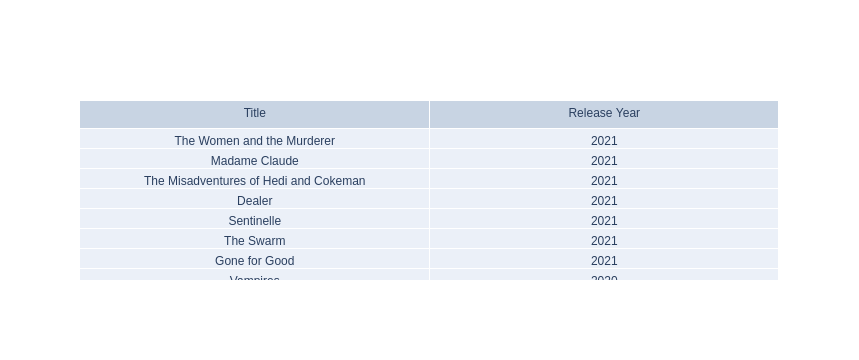

In [40]:
# ploting movie release data through table
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year']),
                 cells=dict(values=[newest_fr_series['title'],newest_fr_series['release_year']]))
                     ])
fig.show()

# Top Duration

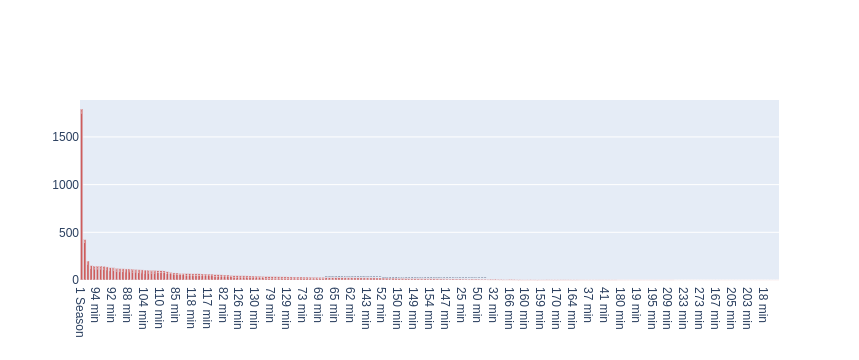

In [41]:
topdirs=pd.value_counts(netflix_overall['duration'])
# print(topdirs)
fig = go.Figure([go.Bar(x=topdirs.index, y=topdirs.values , text=topdirs.values,marker_color='indianred')])
fig.show()

It can be inferred that having one season is the most preferred duration.

# How many Netflix Shows/ Movies are made from books as their storylines?

For a detailed book recommendation system with both content and collaborative filtering click :
    [Book Recommendation, EDA](https://www.kaggle.com/niharika41298/netflix-or-books-recommender-analysis-eda)

In [42]:
books=pd.read_csv('data/goodbooks-10k/books.csv')
books['original_title']=books['original_title'].str.lower()
x=netflix_overall
x['title']=x['title'].str.lower()
t=x.merge(books, left_on='title', right_on='original_title', how="inner")

In [43]:
t.shape

(339, 35)

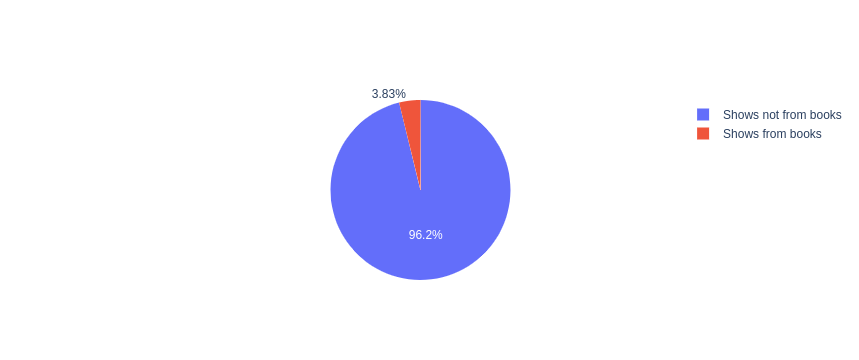

In [44]:
import plotly.graph_objects as go

labels = ['Shows from books','Shows not from books']
values = [248,6234]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

## A little interesting history

Even though it may look like Netflix is fairly new, it has been around since 1997! 

Here's a picture of the older Netflix website when rentals costed only 50 cents each and the website had only about 900 titles.

![](https://producthabits.com/wp-content/uploads/2018/04/Screenshot-2018-03-26-16.08.07.png)

# Recommendation System (Content Based)

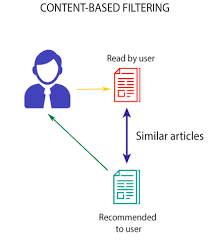

The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
#removing stopwords and creating object of TfidfVector
tfidf = TfidfVectorizer(stop_words='english')

# Replace NaN with an empty string
netflix_overall['description'] = netflix_overall['description'].fillna('')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_overall['description'])

# Output the shape of tfidf_matrix
tfidf_matrix.shape


(8807, 18895)

There are about 16151 words described for the 6234 movies in this dataset.

Here, The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate.

<img src='https://i.stack.imgur.com/36r1U.png'>

In [47]:
# Import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix and removing sparesness in matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [48]:
print(f'shape of tfidf_matrix is {tfidf_matrix.shape}')
print(f'shape of cosine_sim is {cosine_sim.shape}')

shape of tfidf_matrix is (8807, 18895)
shape of cosine_sim is (8807, 8807)


In [50]:
indices = pd.Series(netflix_overall.index, index=netflix_overall['title']).drop_duplicates()
print(indices)

title
dick johnson is dead        0
blood & water               1
ganglands                   2
jailbirds new orleans       3
kota factory                4
                         ... 
zodiac                   8802
zombie dumb              8803
zombieland               8804
zoom                     8805
zubaan                   8806
Length: 8807, dtype: int64


In [51]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # getting index from title
    title=title.lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

This recommendation is just based on the Plot.

In [52]:
get_recommendations('Peaky Blinders')

7683                    our godfather
2646                   my stupid boss
3133                              don
8293                         the fear
7140    jonathan strange & mr norrell
7785                power rangers zeo
8467                       the prison
8539                       the tudors
1510                    the con is on
8391     the legend of michael mishra
Name: title, dtype: object

In [53]:
get_recommendations('Mortel')

256                       nneka the pretty serpent
3674                  pili fantasy: war of dragons
800                                mosquita y mari
4511         edgar rice burroughs' tarzan and jane
6749                             figures of speech
7535    my entire high school sinking into the sea
6760                                     firstborn
4918                                 psychokinesis
5481                                     chamatkar
2190                          the umbrella academy
Name: title, dtype: object

In [54]:
get_recommendations('PK')

3714                                        unbroken
4221                           merku thodarchi malai
7129                                  jhansi ki rani
906     have you ever seen fireflies? - theatre play
4306                                            roma
6031                              a clockwork orange
4569                        harishchandrachi factory
4565                              ek main aur ekk tu
4700                         bhavesh joshi superhero
2148                                    the governor
Name: title, dtype: object

It is seen that the model performs well, but is not very accurate.Therefore, more metrics are added to the model to improve performance.

# Content based filtering on multiple metrics

Content based filtering on the following factors:
* Title
* Cast
* Director
* Listed in
* Plot

Filling null values with empty string.

In [55]:
filledna=netflix_overall.fillna('')
filledna.head(2)

show_id     type                 title         director  \
0      s1    Movie  dick johnson is dead  Kirsten Johnson   
1      s2  TV Show         blood & water                    

                                                cast        country  \
0                                                     United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...

Cleaning the data - making all the words lower case

In [56]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

Identifying features on which the model is to be filtered.

In [57]:
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [58]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

title        director  \
0  dickjohnsonisdead  kirstenjohnson   
1        blood&water                   

                                                cast  \
0                                                      
1  amaqamata,khosingema,gailmabalane,thabangmolab...   

                                   listed_in  \
0                              documentaries   
1  internationaltvshows,tvdramas,tvmysteries   

                                         description  
0  asherfathernearstheendofhislife,filmmakerkirst...  
1  aftercrossingpathsataparty,acapetownteensetsou...

Creating a "soup" or a "bag of words" for all rows.

In [59]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [60]:
filledna['soup'] = filledna.apply(create_soup, axis=1)


From here on, the code is basically similar to the upper model except the fact that count vectorizer is used instead of tfidf.

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [62]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [63]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

In [64]:
get_recommendations_new('PK', cosine_sim2)

1114                           3 idiots
8391       the legend of michael mishra
4790                  anthony kaun hai?
6907                             haapus
1022                   taare zameen par
4507                              sanju
2720                            dostana
4427                    chance pe dance
6439                    chal dhar pakad
195     emi: liya hai to chukana padega
Name: title, dtype: object

In [65]:
get_recommendations_new('Peaky Blinders', cosine_sim2)

3034                    giri / haji
5032    the frankenstein chronicles
8431          the murder detectives
4951                         loaded
4809                  kiss me first
6922                   happy valley
2184                       get even
519                   i am a killer
3789                 killer ratings
4476          terrorism close calls
Name: title, dtype: object

In [66]:
get_recommendations_new('The Hook Up Plan', cosine_sim2)

2982                                        find yourself
1038                                       dancing angels
7438                     melodies of life - born this way
3293                                        little things
6508    club friday to be continued - my beautiful tomboy
7872                                           rishta.com
3463                                      college romance
4171                                    the perfect match
4487                                 accidentally in love
5703                                          refresh man
Name: title, dtype: object